# Titanic - Machine Learning from Disaster

Download the training set from following link https://www.kaggle.com/competitions/titanic/data

> Indented block




In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Description:

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex

Age	Age in years

sibsp	# of siblings / spouses aboard the Titanic

parch	# of parents / children aboard the Titanic

ticket	Ticket number

fare	Passenger fare

cabin	Cabin number

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


**Use NN to create three models that predicts which passengers survived the Titanic shipwreck**

### Data pre-processing



In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data['Name']= label_encoder.fit_transform(data['Name'])

In [ ]:
data['Sex']= label_encoder.fit_transform(data['Sex'])

In [ ]:
data['Ticket']= label_encoder.fit_transform(data['Ticket'])

In [ ]:
tmp=label_encoder.fit_transform(data.Cabin)

In [ ]:
len(label_encoder.classes_)-1

147

In [ ]:
label_encoder.classes_

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [ ]:
import numpy as np
lista=[]
for i in tmp:
  if i==147:
    lista.append(np.nan)
  else:
    lista.append(i)

In [ ]:
data['Cabin']=lista

In [ ]:
tmp=label_encoder.fit_transform(data.Embarked)

In [ ]:
len(label_encoder.classes_)-1

3

In [ ]:
lista=[]
for i in tmp:
  if i==3:
    lista.append(np.nan)
  else:
    lista.append(i)

In [ ]:
data['Embarked']=lista

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,NaN,2.0
1,2,1,1,190,0,38.0,1,0,596,71.2833,81.0,0.0
2,3,1,3,353,0,26.0,0,0,669,7.9250,NaN,2.0
3,4,1,1,272,0,35.0,1,0,49,53.1000,55.0,2.0
4,5,0,3,15,1,35.0,0,0,472,8.0500,NaN,2.0


In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

KNNImputer = KNNImputer(n_neighbors=3)
data['Age'] = KNNImputer.fit_transform(data['Age'].to_numpy().reshape(-1,1))
data['Cabin'] = KNNImputer.fit_transform(data['Cabin'].to_numpy().reshape(-1,1))
data['Embarked'] = KNNImputer.fit_transform(data['Embarked'].to_numpy().reshape(-1,1))

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,76.0,2.0
1,2,1,1,190,0,38.0,1,0,596,71.2833,81.0,0.0
2,3,1,3,353,0,26.0,0,0,669,7.9250,76.0,2.0
3,4,1,1,272,0,35.0,1,0,49,53.1000,55.0,2.0
4,5,0,3,15,1,35.0,0,0,472,8.0500,76.0,2.0


###Feature engineering

Feature engineering, in data science, refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy.

From the columns that denote the number of sibilings and number of parents **define a new column isAlone** which shows if the passenger has relatives on the boat. The column should contain 0s and 1s.

Additionally change the **age column** such that the passengers are divided in five age groups: 0 for age<=16, 1 for 16<age<=32, 2 for 32<age<=48, 3 for 48<age<=64 and 5 for age>64.

Hint: Drop the columns for the number of sibilings and parents

In [ ]:
len(data)

891

In [ ]:
is_alone=[]
for i in range(0,len(data)):
  if(data['SibSp'][i]==1 or data['Parch'][i]==1):
    is_alone.append(0)
  else:
    is_alone.append(1)

In [ ]:
is_alone

[0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


In [ ]:
data['isAlone'] = is_alone

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ssAlone,isAlone
0,1,0,3,108,1,22.0,1,0,523,7.2500,76.0,2.0,1,0
1,2,1,1,190,0,38.0,1,0,596,71.2833,81.0,0.0,1,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,76.0,2.0,0,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55.0,2.0,1,0
4,5,0,3,15,1,35.0,0,0,472,8.0500,76.0,2.0,0,1


In [ ]:
data.drop(['SibSp'], axis=1, inplace=True)

In [ ]:
data.drop(['Parch'], axis=1, inplace=True)

In [ ]:
age=[]
for i in range(0,len(data)):
  if(data['Age'][i] <=16):
    age.append(0)
  elif(data['Age'][i] >=16 and data['Age'][i] <=32):
    age.append(1)
  elif(data['Age'][i] >=33 and data['Age'][i] <=48):
    age.append(2)
  elif(data['Age'][i] >=49 and data['Age'][i] <=64):
    age.append(3)
  else:
    age.append(4)

data['Age'] = age
data



,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,ssAlone,isAlone
0,1,0,3,108,1,1,523,7.2500,76.0,2.0,1,0
1,2,1,1,190,0,2,596,71.2833,81.0,0.0,1,0
2,3,1,3,353,0,1,669,7.9250,76.0,2.0,0,1
3,4,1,1,272,0,2,49,53.1000,55.0,2.0,1,0
4,5,0,3,15,1,2,472,8.0500,76.0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,1,101,13.0000,76.0,2.0,0,1
887,888,1,1,303,0,1,14,30.0000,30.0,2.0,0,1
888,889,0,3,413,0,1,675,23.4500,76.0,2.0,1,0
889,890,1,1,81,1,1,8,30.0000,60.0,0.0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['Survived'], axis = 1)
y = data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,ssAlone,isAlone
0,1,0,3,108,1,1,523,7.2500,76.0,2.0,1,0
1,2,1,1,190,0,2,596,71.2833,81.0,0.0,1,0
2,3,1,3,353,0,1,669,7.9250,76.0,2.0,0,1
3,4,1,1,272,0,2,49,53.1000,55.0,2.0,1,0
4,5,0,3,15,1,2,472,8.0500,76.0,2.0,0,1


### Neural Network 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=11, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/20
18/18 - 0s - loss: 0.6060 - accuracy: 0.6889 - val_loss: 0.6604 - val_accuracy: 0.6503 - 124ms/epoch - 7ms/step
Epoch 2/20
18/18 - 0s - loss: 0.6036 - accuracy: 0.6942 - val_loss: 0.6613 - val_accuracy: 0.6713 - 70ms/epoch - 4ms/step
Epoch 3/20
18/18 - 0s - loss: 0.5899 - accuracy: 0.6960 - val_loss: 0.6414 - val_accuracy: 0.6294 - 67ms/epoch - 4ms/step
Epoch 4/20
18/18 - 0s - loss: 0.5984 - accuracy: 0.7047 - val_loss: 0.6570 - val_accuracy: 0.6783 - 80ms/epoch - 4ms/step
Epoch 5/20
18/18 - 0s - loss: 0.5990 - accuracy: 0.7047 - val_loss: 0.6662 - val_accuracy: 0.6713 - 85ms/epoch - 5ms/step
Epoch 6/20
18/18 - 0s - loss: 0.5897 - accuracy: 0.7100 - val_loss: 0.6359 - val_accuracy: 0.6783 - 206ms/epoch - 11ms/step
Epoch 7/20
18/18 - 0s - loss: 0.5855 - accuracy: 0.7118 - val_loss: 0.6355 - val_accuracy: 0.6573 - 133ms/epoch - 7ms/step
Epoch 8/20
18/18 - 0s - loss: 0.5874 - accuracy: 0.7100 - val_loss: 0.6367 - val_accuracy: 0.6713 - 68ms/epoch - 4ms/step
Epoch 9/20
18/18 - 0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Optimize number of epochs and batch size for NN1

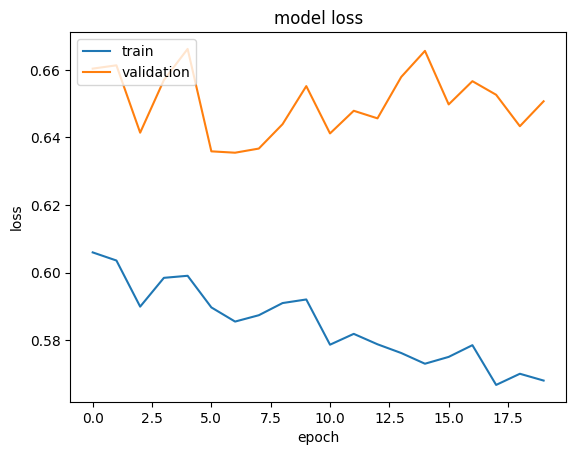

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Neural Network 2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()
model2.add(Dense(30, input_dim=11, kernel_initializer = 'uniform', activation='softmax'))
model2.add(Dense(10,kernel_initializer = 'uniform', activation='softmax'))
model2.add(Dense(10,kernel_initializer = 'uniform', activation='softmax'))
model2.add(Dense(10,kernel_initializer = 'uniform', activation='softmax'))
model2.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2=model2.fit(X_train, Y_train, epochs=20, batch_size=50, verbose=2, validation_split=0.2)

Epoch 1/20
12/12 - 1s - loss: 0.6911 - accuracy: 0.6344 - val_loss: 0.6920 - val_accuracy: 0.5455 - 1s/epoch - 112ms/step
Epoch 2/20
12/12 - 0s - loss: 0.6884 - accuracy: 0.6344 - val_loss: 0.6912 - val_accuracy: 0.5455 - 70ms/epoch - 6ms/step
Epoch 3/20
12/12 - 0s - loss: 0.6858 - accuracy: 0.6344 - val_loss: 0.6906 - val_accuracy: 0.5455 - 76ms/epoch - 6ms/step
Epoch 4/20
12/12 - 0s - loss: 0.6833 - accuracy: 0.6344 - val_loss: 0.6901 - val_accuracy: 0.5455 - 72ms/epoch - 6ms/step
Epoch 5/20
12/12 - 0s - loss: 0.6810 - accuracy: 0.6344 - val_loss: 0.6897 - val_accuracy: 0.5455 - 82ms/epoch - 7ms/step
Epoch 6/20
12/12 - 0s - loss: 0.6789 - accuracy: 0.6344 - val_loss: 0.6894 - val_accuracy: 0.5455 - 62ms/epoch - 5ms/step
Epoch 7/20
12/12 - 0s - loss: 0.6769 - accuracy: 0.6344 - val_loss: 0.6892 - val_accuracy: 0.5455 - 78ms/epoch - 6ms/step
Epoch 8/20
12/12 - 0s - loss: 0.6751 - accuracy: 0.6344 - val_loss: 0.6890 - val_accuracy: 0.5455 - 61ms/epoch - 5ms/step
Epoch 9/20
12/12 - 0s - 

#### Optimize number of epochs and batch size for NN2

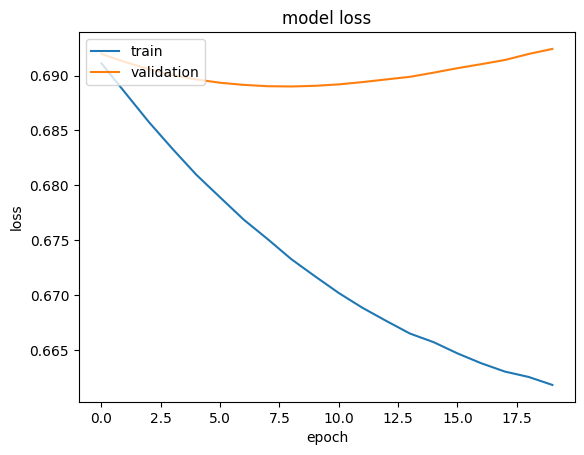

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Neural Network 3

In [ ]:
model3 = Sequential()
model3.add(Dense(25, input_dim=11, kernel_initializer = 'uniform', activation='relu'))
model3.add(Dense(8,kernel_initializer = 'uniform', activation='softmax'))
model3.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history3=model3.fit(X_train, Y_train, epochs=20, batch_size=50, verbose=2, validation_split=0.2)

Epoch 1/20
12/12 - 1s - loss: 0.6879 - accuracy: 0.6432 - val_loss: 0.6901 - val_accuracy: 0.5455 - 1s/epoch - 83ms/step
Epoch 2/20
12/12 - 0s - loss: 0.6846 - accuracy: 0.6344 - val_loss: 0.6896 - val_accuracy: 0.5455 - 69ms/epoch - 6ms/step
Epoch 3/20
12/12 - 0s - loss: 0.6822 - accuracy: 0.6344 - val_loss: 0.6889 - val_accuracy: 0.5455 - 73ms/epoch - 6ms/step
Epoch 4/20
12/12 - 0s - loss: 0.6798 - accuracy: 0.6344 - val_loss: 0.6872 - val_accuracy: 0.5455 - 52ms/epoch - 4ms/step
Epoch 5/20
12/12 - 0s - loss: 0.6768 - accuracy: 0.6344 - val_loss: 0.6841 - val_accuracy: 0.5455 - 69ms/epoch - 6ms/step
Epoch 6/20
12/12 - 0s - loss: 0.6741 - accuracy: 0.6344 - val_loss: 0.6832 - val_accuracy: 0.5455 - 68ms/epoch - 6ms/step
Epoch 7/20
12/12 - 0s - loss: 0.6713 - accuracy: 0.6344 - val_loss: 0.6803 - val_accuracy: 0.5455 - 65ms/epoch - 5ms/step
Epoch 8/20
12/12 - 0s - loss: 0.6681 - accuracy: 0.6344 - val_loss: 0.6773 - val_accuracy: 0.5664 - 58ms/epoch - 5ms/step
Epoch 9/20
12/12 - 0s - l

#### Optimize number of epochs and batch size for NN3

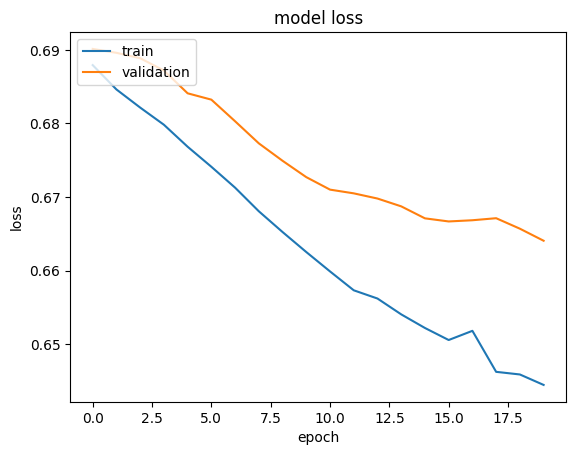

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluate the three NNs

In [ ]:
y_pred3 = model3.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [ ]:
y_pred2 = model2.predict(X_test)

6/6 [==============================] - 0s 3ms/step


## Results analysis

accuracy of the model:  0.7262569832402235


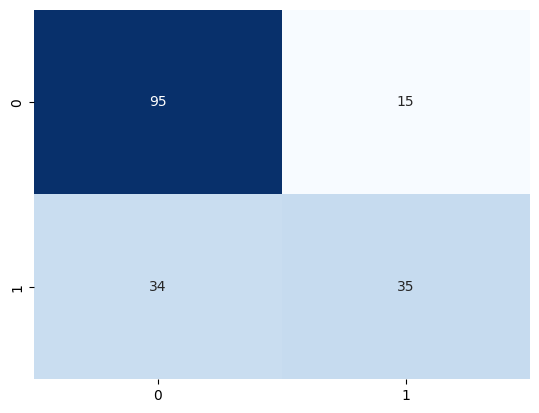

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test, y_pred.round())
print('accuracy of the model: ',ac)

accuracy of the model:  0.6145251396648045


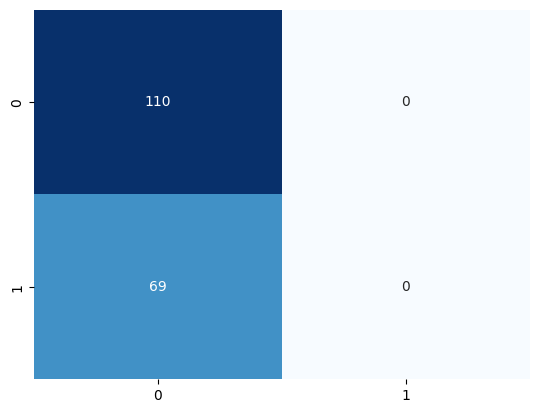

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred2.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test, y_pred2.round())
print('accuracy of the model: ',ac)

accuracy of the model:  0.6536312849162011


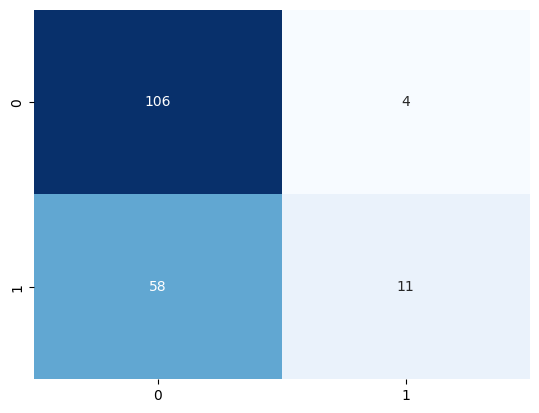

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred3.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test, y_pred3.round())
print('accuracy of the model: ',ac)